<a href="https://colab.research.google.com/github/AlexeyK12/AI-ARROW---Autumn_2024/blob/main/%22%D0%94%D0%97_1_AI_ARROW_4_tasks_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#–û—Å–µ–Ω–Ω–∏–π –±—É—Ç–∫–µ–º–ø "AI ARROW"

## –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ
–í—Å–µ –∑–∞–¥–∞–Ω–∏—è —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º –≤—ã–ø–æ–ª–Ω—è—Ç—å –Ω–∞ GPU –≤ Colab.

### –ó–∞–¥–∞–Ω–∏–µ 1 - –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è MNIST c –ø–æ–º–æ—â—å—é Pytorch (5 –±–∞–ª–ª–æ–≤)

In [ ]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

from IPython.display import clear_output, display
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from tqdm.auto import trange

import torch.nn as nn
import torch.optim as optim

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

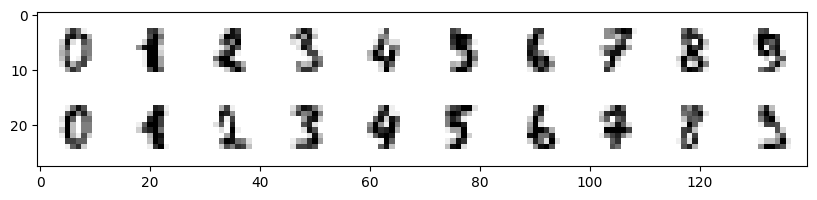

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ MNIST
images, targets = load_digits(return_X_y=True)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
grid = np.pad(images[:20].reshape(20, 8, 8), [[0, 0], [3, 3], [3, 3]]).reshape(2, 10, 14, 14).swapaxes(1, 2).reshape(28, -1)
plt.figure(figsize=(10, 2))
plt.imshow(grid, cmap='gray_r')
targets[:20].reshape(2, 10)

In [ ]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train –∏ test
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=12)

# –°–æ–∑–¥–∞–µ–º torch tensor –∏–∑ np.array
images_train = torch.tensor(images_train, dtype=torch.float32)
images_test = torch.tensor(images_test, dtype=torch.float32)
targets_train = torch.tensor(targets_train, dtype=torch.long)
targets_test = torch.tensor(targets_test, dtype=torch.long)

#### –û—Ç–ª–∞–¥–∫–∞ –±–µ–∑ –æ–±—É—á–µ–Ω–∏—è –Ω—Å.

In [ ]:
hidden_dim_size = 80
input_size = 8 * 8
number_of_classes = 10

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å —Å –¥–≤—É–º—è Linear —Å–ª–æ—è–º–∏ –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ ReLU –º–µ–∂–¥—É –Ω–∏–º–∏
net = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_dim_size, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_dim_size, number_of_classes, bias=True)
)

In [ ]:
# –ü–µ—Ä–≤—ã–π –ø—Ä–æ–≥–æ–Ω –¥–∞–Ω–Ω—ã—Ö —á–µ—Ä–µ–∑ –Ω–µ–æ–±—É—á–µ–Ω–Ω—É—é –Ω—Å.
net_outputs = net(images_train[:2])
net_outputs

tensor([[ 0.7498, -1.0266,  2.5627, -0.5394,  0.7466,  1.2671,  0.3571, -0.4518,
          0.1193, -0.0937],
        [ 0.9891, -1.2550,  2.8089,  0.2349, -1.5856,  2.0303, -1.1245, -0.6429,
         -0.3540, -0.3874]], grad_fn=<AddmmBackward0>)

In [ ]:
print(torch.all((0 <= net_outputs) & (net_outputs <= 1)))
print(net_outputs.sum(dim=-1))

tensor(False)
tensor([3.6910, 0.7139], grad_fn=<SumBackward1>)


In [ ]:
# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ Softmax –Ω–∞ –≤—ã—Ö–æ–¥–µ –Ω—Å. –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
softmax = torch.nn.Softmax(dim=-1)
probabilities = softmax(net_outputs)

print(torch.all((0 <= probabilities) & (probabilities <= 1)))
print(probabilities.sum(dim=-1))

tensor(True)
tensor([1.0000, 1.0000], grad_fn=<SumBackward1>)


In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∑–∏—Ü–∏–∏ —ç–ª–µ–º–µ–Ω—Ç–∞ —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
max_probabilies, ids_of_max_probabilities = probabilities.max(dim=-1)
ids_of_max_probabilities

tensor([2, 2])

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å CrossEntropyLoss –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ torch
loss_function =  torch.nn.CrossEntropyLoss()
loss_function(net_outputs, targets_train[:2])

tensor(3.0280, grad_fn=<NllLossBackward0>)

#### –û–±—É—á–µ–Ω–∏–µ –Ω—Å.

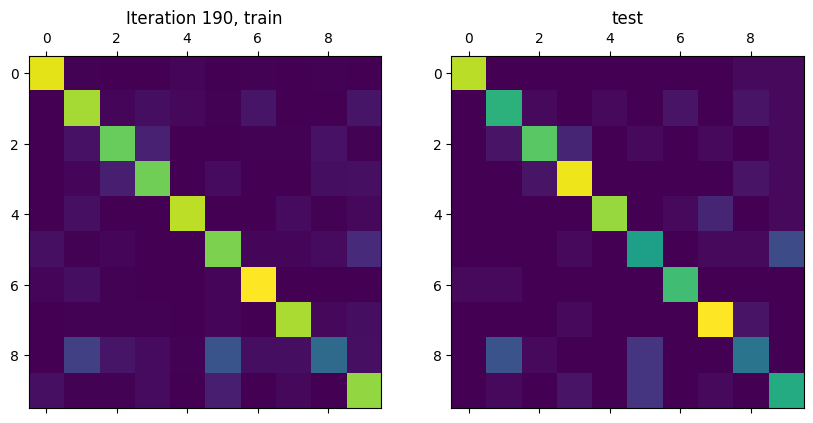

In [ ]:
hidden_dim_size = 80
input_size = 8 * 8
number_of_classes = 10

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å —Å –¥–≤—É–º—è Linear —Å–ª–æ—è–º–∏ –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ ReLU –º–µ–∂–¥—É –Ω–∏–º–∏
net = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_dim_size, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_dim_size, number_of_classes, bias=True)
)

# –ü—Ä–∏–º–µ–Ω–∏—Ç—å –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä SGD –∏–∑ torch, —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å learning rate —Ä–∞–≤–Ω—ã–π 1e-3
optimizer = optim.SGD(net.parameters(), lr=1e-3)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
loss_function = nn.CrossEntropyLoss()

# –î–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è
fig, [ax_train, ax_test] = plt.subplots(1, 2, figsize=[10, 5])

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
def visualize():
    ax_train.clear()
    ax_train.set_title(f'Iteration {iter_i}, train')
    ax_train.matshow(confusion_matrix(targets_train, get_predicted_classes(images_train)))
    ax_test.set_title(f'test')
    ax_test.matshow(confusion_matrix(targets_test, get_predicted_classes(images_test)))
    clear_output(wait=True)
    display(fig)

def get_predicted_classes(images):
    return softmax(net(images).detach()).max(dim=-1)[1]

iters_n = 200

# –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è
for iter_i in range(iters_n):

    # –ü–µ—Ä–µ–¥–∞–µ–º –¥–∞–Ω–Ω—ã–µ –≤ –Ω—Å. –ø–æ–ª—É—á–∞–µ–º –æ—Ç–≤–µ—Ç—ã
    nn_outputs = net(images_train)

    # –°—á–∏—Ç–∞–µ–º –æ—à–∏–±–∫—É –∏—Ç–µ—Ä–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è
    loss = loss_function(nn_outputs, targets_train)

    # –û–±–Ω—É–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
    optimizer.zero_grad()

    # –°—á–∏—Ç–∞–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –∏ –¥–µ–ª–∞–µ–º –æ–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏
    loss.backward()

    # –î–µ–ª–∞–µ–º —à–∞–≥ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞
    optimizer.step()

    # –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫ –∫–∞–∂–¥—ã–µ 10 —ç–ø–æ—Ö
    if iter_i % 10 == 0:
        visualize()
plt.close()

### –ó–∞–¥–∞–Ω–∏–µ 2 - –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∫–æ—Ç–æ–≤ –∏ —Å–æ–±–∞–∫ (15 –±–∞–ª–ª–æ–≤)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º –∏ —Ä–∞—Å–ø–∞–∫—É–µ–º –¥–∞—Ç–∞—Å–µ—Ç
!wget -nc https://www.dropbox.com/s/gqdo90vhli893e0/data.zip
!unzip -n data.zip -d data

–í—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ–±—Ä–µ–∑–∞–Ω—ã –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å—Ç—Ä–æ–∫ (5000).
  inflating: data/train_11k/dog/dog.11174.jpg  
  inflating: data/train_11k/dog/dog.11175.jpg  
  inflating: data/train_11k/dog/dog.11177.jpg  
  inflating: data/train_11k/dog/dog.11180.jpg  
  inflating: data/train_11k/dog/dog.11182.jpg  
  inflating: data/train_11k/dog/dog.11183.jpg  
  inflating: data/train_11k/dog/dog.11185.jpg  
  inflating: data/train_11k/dog/dog.11189.jpg  
  inflating: data/train_11k/dog/dog.1119.jpg  
  inflating: data/train_11k/dog/dog.11190.jpg  
  inflating: data/train_11k/dog/dog.11193.jpg  
  inflating: data/train_11k/dog/dog.11194.jpg  
  inflating: data/train_11k/dog/dog.11196.jpg  
  inflating: data/train_11k/dog/dog.11197.jpg  
  inflating: data/train_11k/dog/dog.11198.jpg  
  inflating: data/train_11k/dog/dog.1120.jpg  
  inflating: data/train_11k/dog/dog.11201.jpg  
  inflating: data/train_11k/dog/dog.11202.jpg  
  inflating: data/

In [ ]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

import os
from matplotlib import pyplot as plt
import numpy as np
import time
from tqdm import tqdm_notebook as tqdm
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchsummary import summary

In [ ]:
# –ó–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º random seed –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
torch.manual_seed(22)

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º –≤ –æ–¥–Ω–æ–º –º–µ—Å—Ç–µ –≤—Å–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –Ω–∞–º –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º.
# –ò—Ö —Å–º—ã—Å–ª –±—É–¥–µ—Ç –ø—Ä–æ—è—Å–Ω—ë–Ω –ø–æ –º–µ—Ä–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è

# –ü—É—Ç—å –¥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
DATA_PATH = 'data'

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Ç–æ–∫–æ–≤ –¥–ª—è data loader
NUM_WORKERS = 4

# –†–∞–∑–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –∫–æ–ª-–≤–æ –∫–∞–Ω–∞–ª–æ–≤
SIZE_H = SIZE_W = 96
N_CHANNELS = 3

# –ß–∏—Å–ª–æ –∫–ª–∞—Å—Å–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
NUM_CLASSES = 2

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
EPOCH_NUM = 30

# –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞, –æ–±—ã—á–Ω–æ —è–≤–ª—è–µ—Ç—Å—è 2**N
BATCH_SIZE = 128

# –°—Ä–µ–¥–Ω–µ–µ –∏ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–µ –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
image_mean = [0.485, 0.456, 0.406]
image_std  = [0.229, 0.224, 0.225]

# –†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ—è (embeddings) CNN –º–æ–¥–µ–ª–∏
EMBEDDING_SIZE = 256

In [ ]:
# –ü—Ä–æ—Å–º–æ—Ç—Ä –ø–∞—Ä–∞–º–µ—Ä—Ç–æ–≤ GPU.
# –î–ª—è –∑–∞–ø—É—Å–∫–∞ Colab –Ω–∞ GPU: –°—Ä–µ–¥–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è -> –°–º–µ–Ω–∏—Ç—å —Å—Ä–µ–¥—É –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è -> T4 GPU
!nvidia-smi

Sat Oct 19 12:51:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

–ï—Å–ª–∏ GPU –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–æ, —Ç–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∫–æ–º–∞–Ω–¥—ã –≤—ã–¥–∞—Å—Ç —Ç–∞–∫–æ–µ —Å–æ–æ–±—â–µ–Ω–∏–µ

```
Mon Oct 14 20:24:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
                                                                                         
+---------------------------------------------------------------------------------------+
| Processes:                                                                            |
|  GPU   GI   CI        PID   Type   Process name                            GPU Memory |
|        ID   ID                                                             Usage      |
|=======================================================================================|
|  No running processes found                                                           |
+---------------------------------------------------------------------------------------+
```



In [ ]:
# –ò—Å–ø–æ–ª—å–∑—É–µ–º GPU –ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [ ]:
transformer = transforms.Compose([
    transforms.Resize((SIZE_H, SIZE_W)),        # –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–æ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞
    transforms.ToTensor(),                      # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ç–µ–Ω–∑–æ—Ä
    transforms.Normalize(image_mean, image_std) # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–∞–Ω–∞–ª–∞
])

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(os.path.join(DATA_PATH, 'train_11k'), transform=transformer)
val_dataset   = torchvision.datasets.ImageFolder(os.path.join(DATA_PATH, 'val'), transform=transformer)
test_dataset  = torchvision.datasets.ImageFolder(os.path.join(DATA_PATH, 'test_labeled'), transform=transformer)

In [ ]:
n_train, n_val, n_test = len(train_dataset), len(val_dataset), len(test_dataset)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#### –ó–∞–¥–∞–Ω–∏–µ 2.1. –ò–∑—É—á–∏—Ç—å —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ train_loader (1 –±–∞–ª–ª)
–ü—Ä–æ–≤–µ—Å—Ç–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –æ–±—É—á–∞–µ–º—Å—è. –û—Ç–æ–±—Ä–∞–∑–∏—Ç—å –∫–∞—Ä—Ç–∏–Ω–∫–∏ –∏–∑ –±–∞—Ç—á–∞ –∏ –≤—ã–≤–µ—Å—Ç–∏ –∏—Ö –º–µ—Ç–∫–∏

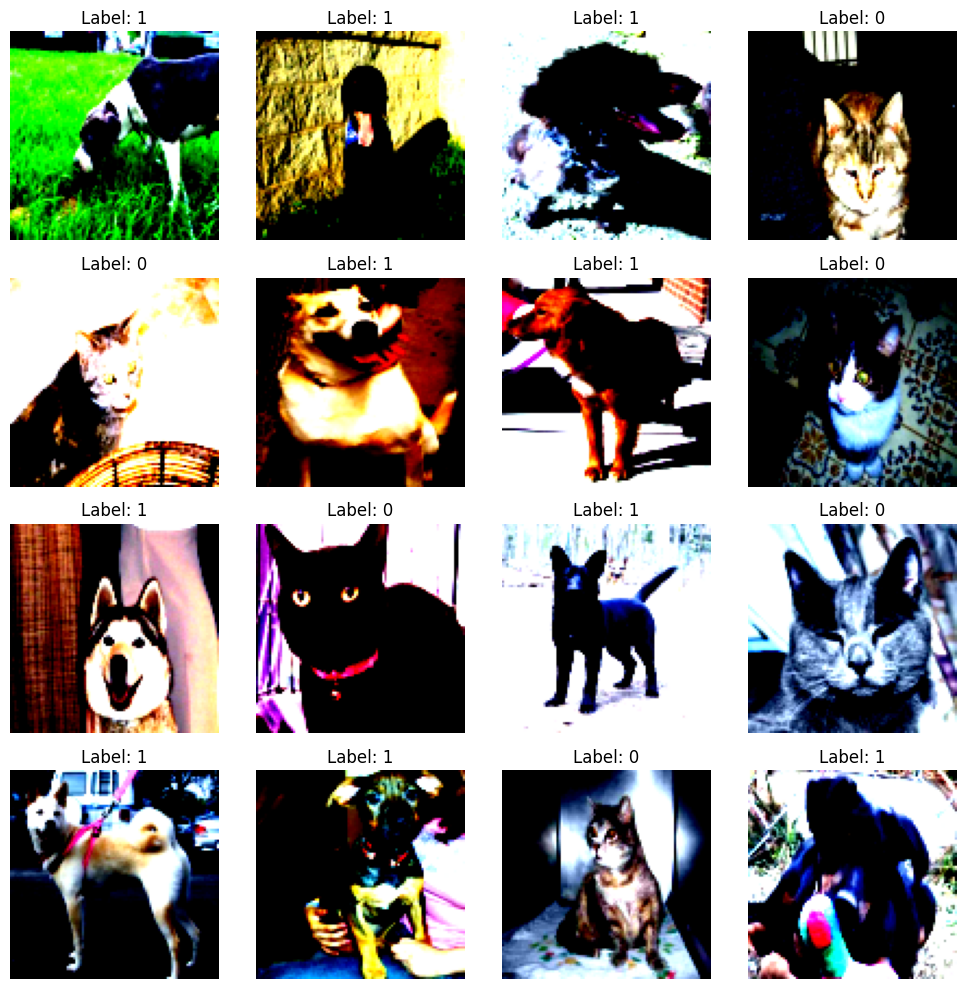

In [ ]:
train_iterator = iter(train_loader)
images_batch, images_labels = next(train_iterator)

num_images = 16

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for img, label, ax in zip(images_batch[:num_images], images_labels[:num_images], axes):
    if img.shape[0] == 3:
        img = img.permute(1, 2, 0)
    else:
        img = img.squeeze()

    ax.imshow(img, cmap='gray' if img.ndim == 2 else None)
    ax.set_title(f'Label: {label.item()}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [ ]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs):

    '''
    model: –Ω–µ–π—Ä–æ—Å–µ—Ç—å –¥–ª—è –æ–±—É—á–µ–Ω–∏—è,
    train_loader, val_loader: –∑–∞–≥—Ä—É–∑—á–∏–∫–∏ –¥–∞–Ω–Ω—ã—Ö
    loss_fn: —Ü–µ–ª–µ–≤–∞—è –º–µ—Ç—Ä–∏–∫–∞ (–∫–æ—Ç–æ—Ä—É—é –±—É–¥–µ–º –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å)
    opt: –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä (–æ–±–Ω–æ–≤–ª—è–µ—Ç –≤–µ—Å–∞ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏)
    n_epochs: –∫–æ–ª-–≤–æ —ç–ø–æ—Ö, –ø–æ–ª–Ω—ã—Ö –ø—Ä–æ—Ö–æ–¥–æ–≤ –¥–∞—Ç–∞—Å–µ—Ç–∞
    '''

    train_loss = []
    val_accuracy = []

    for epoch in range(n_epochs):
        start_time = time.time()

        model.train(True)
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            opt.zero_grad()
            predictions = model(X_batch)
            loss = loss_fn(predictions, y_batch)
            loss.backward()
            opt.step()
            train_loss.append(loss.item())

        model.train(False)
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            logits = model(X_batch)
            y_pred = logits.max(1)[1].data
            val_accuracy.append(np.mean( (y_batch.cpu() == y_pred.cpu()).numpy() ))

        print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss_value = np.mean(train_loss[-n_train // BATCH_SIZE :])
        val_accuracy_value = np.mean(val_accuracy[-n_val // BATCH_SIZE :]) * 100

        print(f"  training loss (in-iteration): \t{train_loss_value:.6f}")
        print(f"  validation accuracy: \t\t\t{val_accuracy_value:.2f} %")

    return model, train_loss, val_accuracy

In [ ]:
def test_model(model, test_loader, subset='test'):
    model.train(False)
    test_batch_acc = []
    for X_batch, y_batch in test_loader:
        logits = model(X_batch.to(device))
        y_pred = logits.max(1)[1].data
        test_batch_acc.append(np.mean( (y_batch.cpu() == y_pred.cpu()).numpy() ))

    test_accuracy = np.mean(test_batch_acc)

    print("Results:")
    print(f"  {subset} accuracy:\t\t{test_accuracy * 100:.2f} %")
    if test_accuracy > 0.9:
        print("Amazing!")
    elif test_accuracy > 0.7:
        print("Good!")
    else:
        print("We need more magic! Follow instructons below")
    return test_accuracy

#### –ó–∞–¥–∞–Ω–∏–µ 2.2. –†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–≤–µ—Ä—Ç–æ—á–Ω—É—é –Ω–µ–π—Ä–æ—Å–µ—Ç—å –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (4 –±–∞–ª–ª–∞)

**conv-pool-conv-pool-dense-dense!**

–°–æ–∑–¥–∞–π—Ç–µ –º–∏–Ω–∏-—Å–≤–µ—Ä—Ç–æ—á–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å —Å–æ —Å–ª–µ–¥—É—é—â–µ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π:
* –í—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
* 3 –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏—Ö —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö –±–ª–æ–∫–∞`convolution->relu->pool`:
  * —Å–≤–µ—Ä—Ç–∫–∞ 3x3 —Å 128 —Ñ–∏–ª—å—Ç—Ä–∞–º–∏ –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ _ReLU_
  * 2x2 –ø—É–ª–∏–Ω–≥ (–∏–ª–∏ –ø–æ—Å—Ç–∞–≤—å—Ç–µ –¥–ª—è –ø—Ä–µ–¥—ã–¥—É—â–µ–π —Å–≤–µ—Ä—Ç–∫–∏ —Å—Ç—Ä–∞–π–¥ = 3)
 * Flatten
* 30% Dropout
* –õ–∏–Ω–µ–π–Ω—ã–π —Å–ª–æ–π —Å 256 –Ω–µ–π—Ä–æ–Ω–∞–º–∏ –∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ _ReLU_
* 30% dropout
* –í—ã—Ö–æ–¥–Ω–æ–π –ª–∏–Ω–µ–π–Ω—ã–π —Å–ª–æ–π.

__Convolutional layers__ –≤ —Ç–æ—Ä—á–µ —Å–æ–∑–¥–∞—é—Ç—Å—è –∫–∞–∫ –ª—é–±–æ–π –¥—Ä—É–≥–æ–π —Å–ª–æ–π, –Ω–æ —É –Ω–µ–≥–æ –µ—Å—Ç—å –æ—Å–æ–±—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

__`...`__

__`model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3)) # —Å–≤–µ—Ç—Ä–∫–∞`__

__`model.add_module('pool1', nn.MaxPool2d(2)) # max pooling 2 –Ω–∞ 2`__

__`...`__


–ö–æ–≥–¥–∞ –≤—ã –∑–∞–∫–æ–Ω—á–∏—Ç–µ —Å–æ–∑–¥–∞–Ω–∏–µ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ (–∫–æ–≥–¥–∞ —Ñ—É–Ω–∫—Ü–∏—è compute_loss –Ω–µ –±—É–¥–µ—Ç –ø–æ–¥–Ω–∏–º–∞—Ç—å –æ—à–∏–±–∫–∏), –æ–±—É—á–∏—Ç–µ –µ—ë —Å –æ–ø—Ç–∏–º–∞–π–∑–µ—Ä–æ–º __Adam__ —Å —à–∞–≥–æ–º –æ–±—É—á–µ–Ω–∏—è LR = 3e-4 (learning rate)

–ï—Å–ª–∏ –≤—Å—ë –≤–µ—Ä–Ω–æ, –≤—ã –¥–æ–ª–∂–Ω—ã –ø–æ–ª—É—á–∏—Ç—å –º–∏–Ω–∏–º—É–º __75%__ —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.

__–ü–æ–¥—Å–∫–∞–∑–∫–∞ 1__ : –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–Ω–∞–ª–æ–≤ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –≤ –ø–æ—Ä—è–¥–∫–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ class_labels

__–ü–æ–¥—Å–∫–∞–∑–∫–∞ 2__ : –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ—Å—Ç–∞–≤–∏—Ç—å stride=2 –¥–ª—è Conv2d —Å–ª–æ—è —á—Ç–æ–±—ã —É–≤–µ–ª–∏—á–∏—Ç—å —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è, –Ω–æ –ø–æ–º–Ω–∏—Ç–µ –ø—Ä–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏

__–ü–æ–¥—Å–∫–∞–∑–∫–∞ 3__ : –º–æ–∂–Ω–æ –Ω–µ —Å—á–∏—Ç–∞—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å–ª–æ–µ–≤ —Ä—É–∫–∞–º–∏, –ø—Ä–æ—Å—Ç–æ –≤—Å—Ç–∞–≤—å—Ç–µ –ª—é–±—É—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –∏ –∑–∞–ø—É—Å—Ç–∏—Ç–∏—Ç–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, 1 —é–Ω–∏—Ç) –∏  –∑–∞–ø—É—Å—Ç–∏—Ç–µ compute_loss. –í—ã –ø–æ–ª—É—á–∏—Ç–µ –æ—à–∏–±–∫—É:

__`RuntimeError: size mismatch, m1: [5 x 1960], m2: [1 x 64] at /some/long/path/to/torch/operation`__
–í–∏–¥–∏—Ç–µ __1960__? –≠—Ç–æ —Ç–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å, –∫–æ—Ç–æ—Ä—É—é –≤–∞–º –Ω—É–∂–Ω–æ –≤—ã—Å—Ç–∞–≤–∏—Ç—å.

In [ ]:
model_cnn = nn.Sequential()

model_cnn.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, stride=1, padding=1))
model_cnn.add_module('relu1', nn.ReLU())
model_cnn.add_module('pool1', nn.MaxPool2d(kernel_size=2, stride=2))

model_cnn.add_module('conv2', nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1))
model_cnn.add_module('relu2', nn.ReLU())
model_cnn.add_module('pool2', nn.MaxPool2d(kernel_size=2, stride=2))

model_cnn.add_module('conv3', nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1))
model_cnn.add_module('relu3', nn.ReLU())
model_cnn.add_module('pool3', nn.MaxPool2d(kernel_size=2, stride=2))

model_cnn.add_module('gap_5', nn.AdaptiveAvgPool2d((1, 1)))
model_cnn.add_module('dropout_5', nn.Dropout(0.3))

model_cnn.add_module('flat', nn.Flatten())

model_cnn.add_module('fc_6', nn.Linear(128, EMBEDDING_SIZE))
model_cnn.add_module('relu_6', nn.ReLU())
model_cnn.add_module('dropout_6', nn.Dropout(0.3))

model_cnn.add_module('fc_logits', nn.Linear(EMBEDDING_SIZE, NUM_CLASSES))
model_cnn.add_module('fc_preds', nn.Sigmoid())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cnn.to(device)

Sequential(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (gap_5): AdaptiveAvgPool2d(output_size=(1, 1))
  (dropout_5): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc_6): Linear(in_features=128, out_features=256, bias=True)
  (relu_6): ReLU()
  (dropout_6): Dropout(p=0.3, inplace=False)
  (fc_logits): Linear(in_features=256, out_features=2, bias=True)
  (fc_preds): Sigmoid()
)

In [ ]:
summary(model_cnn, train_dataset[0][0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 96, 96]           3,584
              ReLU-2          [-1, 128, 96, 96]               0
         MaxPool2d-3          [-1, 128, 48, 48]               0
            Conv2d-4          [-1, 128, 48, 48]         147,584
              ReLU-5          [-1, 128, 48, 48]               0
         MaxPool2d-6          [-1, 128, 24, 24]               0
            Conv2d-7          [-1, 128, 24, 24]         147,584
              ReLU-8          [-1, 128, 24, 24]               0
         MaxPool2d-9          [-1, 128, 12, 12]               0
AdaptiveAvgPool2d-10            [-1, 128, 1, 1]               0
          Dropout-11            [-1, 128, 1, 1]               0
          Flatten-12                  [-1, 128]               0
           Linear-13                  [-1, 256]          33,024
             ReLU-14                  [

In [ ]:
# –û–ø—Ç–∏–º–∞–π–∑–µ—Ä
opt = optim.Adam(model_cnn.parameters(), lr=3e-4)

# –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (–õ–æ—Å—Å —Ñ—É–Ω–∫—Ü–∏—è)
loss_fn = nn.CrossEntropyLoss()

# –ß–∏—Å–ª–æ —ç–ø–æ—Ö
n_epochs = 50

In [ ]:
%%time
opt.zero_grad()
model_cnn, train_loss, val_accuracy = train_model(model_cnn, train_loader, val_loader, loss_fn, opt, n_epochs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1 of 50 took 37.308s
  training loss (in-iteration): 	0.664738
  validation accuracy: 			58.33 %
Epoch 2 of 50 took 38.370s
  training loss (in-iteration): 	0.641365
  validation accuracy: 			60.95 %
Epoch 3 of 50 took 38.559s
  training loss (in-iteration): 	0.628986
  validation accuracy: 			60.94 %
Epoch 4 of 50 took 38.742s
  training loss (in-iteration): 	0.618565
  validation accuracy: 			60.57 %
Epoch 5 of 50 took 39.329s
  training loss (in-iteration): 	0.607895
  validation accuracy: 			64.32 %
Epoch 6 of 50 took 39.683s
  training loss (in-iteration): 	0.597661
  validation accuracy: 			65.08 %
Epoch 7 of 50 took 40.129s
  training loss (in-iteration): 	0.587315
  validation accuracy: 			62.43 %
Epoch 8 of 50 took 38.226s
  training loss (in-iteration): 	0.571497
  validation accuracy: 			66.11 %
Epoch 9 of 50 took 38.212s
  training loss (in-iteration): 	0.557620
  validation accuracy: 			67.73 %
Epoch 10 of 50 took 38.372s
  training loss (in-iteration): 	0.559647
  v

In [ ]:
best_model_cnn = model_cnn

val_accuracy = test_model(best_model_cnn, val_loader, subset='val')
test_accuracy = test_model(best_model_cnn, test_loader, subset='test')

Results:
  val accuracy:		77.83 %
Good!
Results:
  test accuracy:		80.29 %
Good!


### –ó–∞–¥–∞–Ω–∏–µ 3 - –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å Roboflow –∏ YOLOv11 (5 –±–∞–ª–ª–æ–≤)

–ó–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä—É–π—Ç–µ—Å—å –Ω–∞ https://public.roboflow.com/. –ò–∑—É—á–∏—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —Å–µ—Ä–≤–∏—Å–∞. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ —Å–æ–∑–¥–∞—Ç—å, —Ä–∞–∑–º–µ—Ç–∏—Ç—å –∏ —ç–∫—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç. –ó–∞–≥—Ä—É–∑–∏—Ç–µ –≤ Colab –¥–∞—Ç–∞—Å–µ—Ç - https://universe.roboflow.com/tiger-vliot/tiger-z0d6k

**–ü–æ–¥—Å–∫–∞–∑–∫–∞**: —Å–º. —Ä–∞–∑–¥–µ–ª Dataset

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –±—É–¥–µ—Ç –≤ —è—á–µ–π–∫–µ –∑–∞–ø—É—Å—Ç–∏—Ç—å –ø–æ–¥–æ–±–Ω—É—é –∫–æ–º–∞–Ω–¥—É:
```
!curl -L "https://universe.roboflow.com/ds/lwP1Jek5kM?key=<–≤–∞—à –∫–ª—é—á>" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
```



In [ ]:
!curl -L "https://app.roboflow.com/ds/lRx42Ym9JZ?key=dlhRg46dpX" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   900  100   900    0     0   3219      0 --:--:-- --:--:-- --:--:--  3214
100 32.2M  100 32.2M    0     0  11.3M      0  0:00:02  0:00:02 --:--:-- 19.7M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: train/
 extracting: train/IMG_8663-383_jpg.rf.07b0f0ce8765ad6090db76a1dc2280df.jpg  
  inflating: train/IMG_8663-383_jpg.rf.07b0f0ce8765ad6090db76a1dc2280df.xml  
 extracting: train/IMG_8663-383_jpg.rf.2ae20601a43984b4a439d058bc0d303a.jpg  
  inflating: train/IMG_8663-383_jpg.rf.2ae20601a43984b4a439d058bc0d303a.xml  
 extracting: train/IMG_8663-383_jpg.rf.c4ffcf9623f18e3f354a344fe91205c6.jpg  
  inflating: train/IMG_8663-383_jpg.rf.c4ffcf9623f18e3f354a344fe91205c6.xml  
 extracting: train/IMG_8664-037_jpg.rf.2fa3a99107f4affc5bc16860a7b08ebb.jpg  
  inflating: train/

In [ ]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
!pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 876.6/876.6 kB 34.4 MB/s eta 0:00:00


In [ ]:
# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å–∫–æ—Ä–æ—Å—Ç–∏ –∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏ –æ—Ç –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã (—Å–º. –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ - https://docs.ultralytics.com/models/yolo11/#supported-tasks-and-modes), —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∫–∞–¥—Ä–∞, –∫–æ–ª-–≤–∞ —ç–ø–æ—Ö, —Ä–∞–∑–º–µ—Ä–∞ –±–∞—Ç—á–∞. –í—ã–±—Ä–∞—Ç—å –∏ –æ–±–æ—Å–Ω–æ–≤–∞—Ç—å –Ω–µ –º–µ–Ω–µ–µ 3 –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–π, –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∏ –ø—Ä–æ–≤–µ—Å—Ç–∏ –¥–µ—Ç–µ–∫—Ü–∏—é –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.

In [ ]:
model = YOLO("yolo11n.pt")

In [ ]:
os.environ['WANDB_DISABLED'] = 'true'
results = model.train(data='/content/dataset.yaml', epochs=3, imgsz=640, batch=32)

Ultralytics 8.3.17 üöÄ Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:262: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:267: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

AMP: checks passed ‚úÖ


train: Scanning /content/train.cache... 0 images, 345 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 345/345 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è No labels found in /content/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/train.cache... 0 images, 345 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 345/345 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è No labels found in /content/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train11/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ‚úÖ
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train11
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/11 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:915: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:917: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

                   all        345          0          0          0          0          0
WARNING ‚ö†Ô∏è no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:915: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:917: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/11 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:915: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:917: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

                   all        345          0          0          0          0          0
WARNING ‚ö†Ô∏è no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/11 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:915: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:917: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this o

                   all        345          0          0          0          0          0
WARNING ‚ö†Ô∏è no labels found in detect set, can not compute metrics without labels



3 epochs completed in 0.024 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 5.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.17 üöÄ Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:262: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:267: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:915: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:185.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:917: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because 

                   all        345          0          0          0          0          0
WARNING ‚ö†Ô∏è no labels found in detect set, can not compute metrics without labels


Speed: 0.4ms preprocess, 2.7ms inference, 0.0ms loss, 12.9ms postprocess per image
Results saved to runs/detect/train11


AttributeError: 'DetMetrics' object has no attribute 'curves_results'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [ ]:
validation_results = model.val()

### –ó–∞–¥–∞–Ω–∏–µ 4 - –ó–∞–ø—É—Å–∫ Yolo World (5 –±–∞–ª–ª–æ–≤)

–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—Ç—å –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç—å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º—É–ª—å—Ç–∏–º–æ–¥–∞–ª—å–Ω–æ–π —Å–µ—Ç–∏ YOLO-World –Ω–∞ –¥–∞–Ω–Ω—ã—Ö —Å —Ñ–æ—Ç–æ–ª–æ–≤—É—à–µ–∫. –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∫–ª–∞—Å—Å –æ–±—ä–µ–∫—Ç–∞ –∏ –≤—ã–¥–µ–ª–∏—Ç—å Bbox. –°–¥–µ–ª–∞—Ç—å –∏ –∑–∞–ø–∏—Å–∞—Ç—å –≤—ã–≤–æ–¥—ã.

https://github.com/AILab-CVC/YOLO-World

–ò–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –ø–æ —É—Å—Ç–∞–Ω–æ–≤–∫–µ - https://github.com/AILab-CVC/YOLO-World?tab=readme-ov-file#1-installation

In [ ]:
# !wget http://nature.kremlin.ru/media/photo/img1880x960/dL75vHN9KMAUjdltgHvr5qaA0CMGjLdS.JPG
# !wget http://nature.kremlin.ru/media/photo/img1880x960/pH1i2rsS5mUAcWeeVrovTb3J0qeMORHK.JPG
# !wget http://nature.kremlin.ru/media/photo/img1880x960/u9b3F5xrbDPAb8SM8i0RWvqA6sVZy1Gu.jpg
# !wget http://nature.kremlin.ru/media/photo/img1880x960/6btA3Aa451SHFiwQVoPRglHlQSGFQ6JP.JPG

In [ ]:
!git clone https://github.com/AILab-CVC/YOLO-World.git

%cd YOLO-World

Cloning into 'YOLO-World'...
remote: Enumerating objects: 1116, done.
remote: Counting objects: 100% (389/389), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 1116 (delta 291), reused 221 (delta 221), pack-reused 727 (from 1)
Receiving objects: 100% (1116/1116), 3.89 MiB | 28.88 MiB/s, done.
Resolving deltas: 100% (631/631), done.
/content/YOLO-World


In [ ]:
!pip install -r "/content/YOLO-World/requirements/basic_requirements.txt"

ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.11.41, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.5.5.62, 4.7.0.68, 4.8.0.74
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.2.0.34 (from versions: 3.4.10.37, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84)
ERROR: No matching distribution found for opencv-python-headless==4.2.0.34
